Calculating Z-scores for benin-malanville:
Outliers in benin-malanville:
GHI      89
DNI       0
DHI    3738
dtype: int64


Calculating Z-scores for sierraleone-bumbuna:
Outliers in sierraleone-bumbuna:
GHI    2477
DNI    7586
DHI    2986
dtype: int64


Calculating Z-scores for togo-dapaong_qc:
Outliers in togo-dapaong_qc:
GHI     305
DNI    1062
DHI    3415
dtype: int64




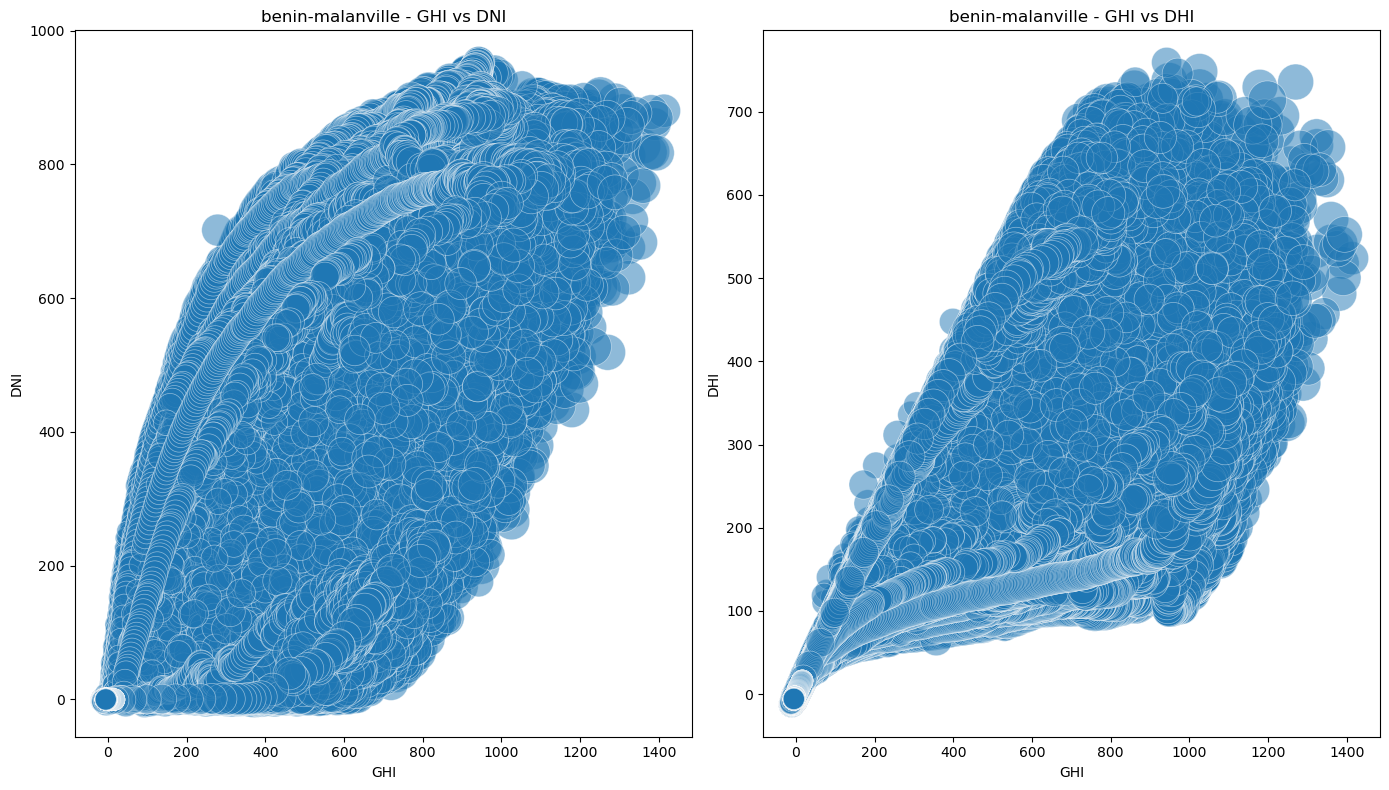

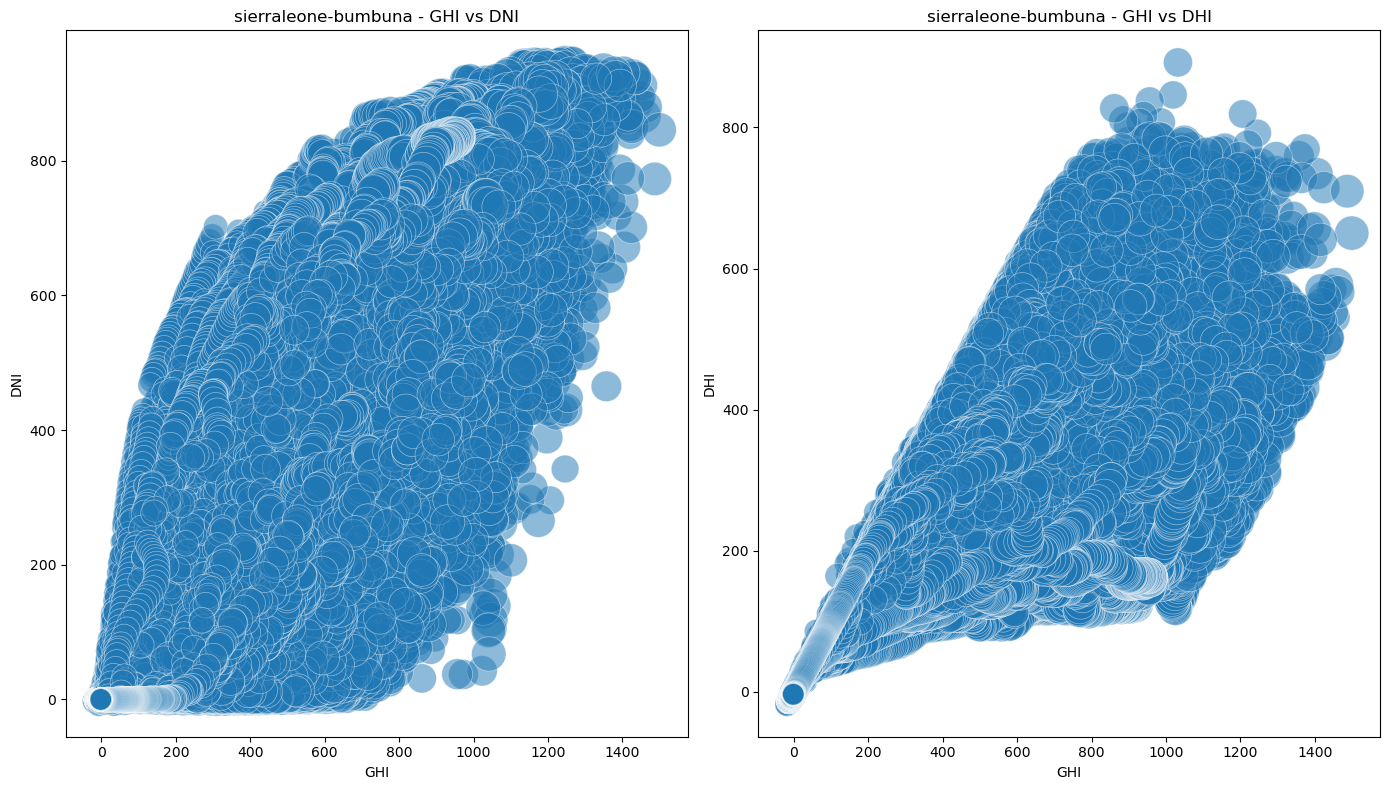

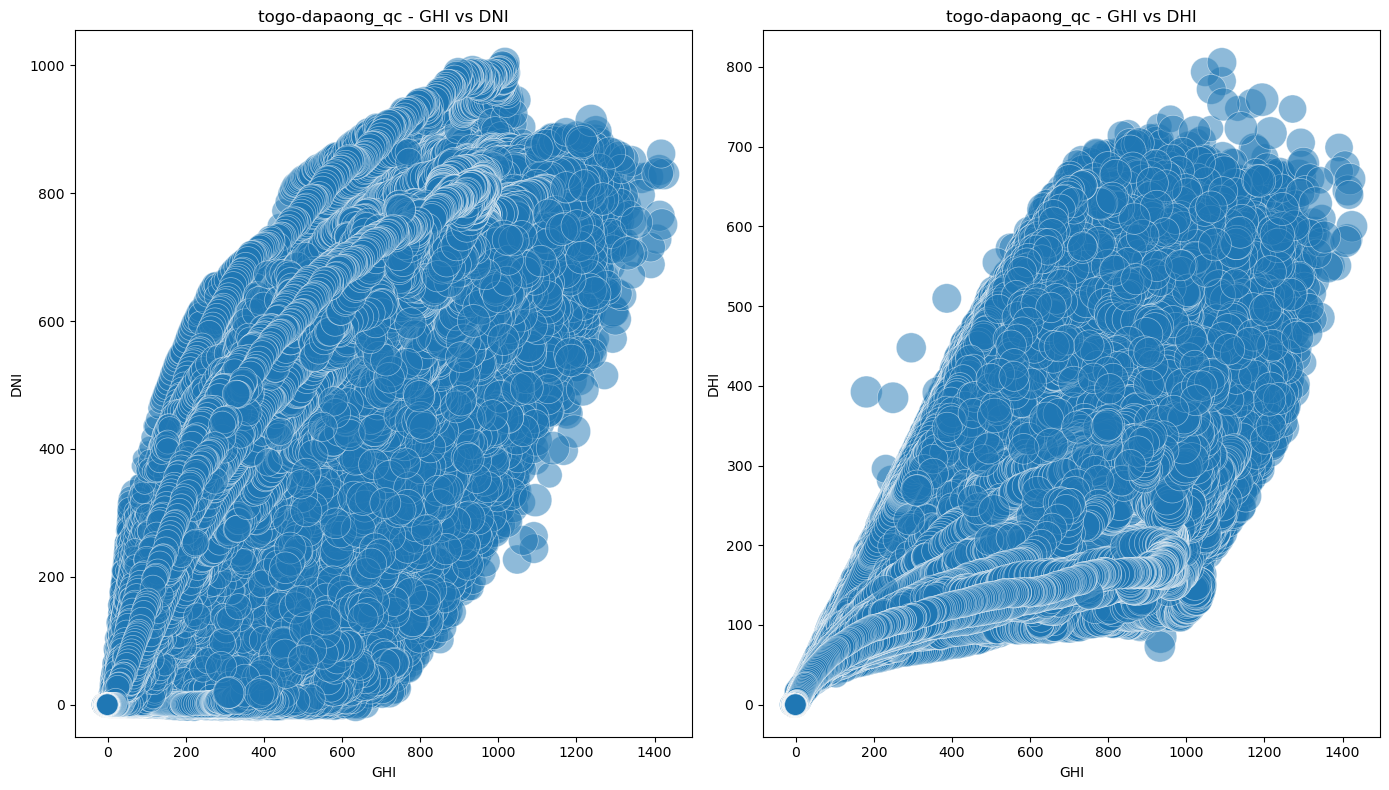

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Define file paths for the datasets
file_paths = {
    'benin-malanville': 'benin-malanville_data.csv',
    'sierraleone-bumbuna': 'sierraleone-bumbuna_data.csv',
    'togo-dapaong_qc': 'togo-dapaong_qc_data.csv'
}

class AdvancedDataAnalyzer:
    def __init__(self, file_paths):
        # Load datasets
        self.dataframes = {country: pd.read_csv(path) for country, path in file_paths.items()}

    def calculate_z_scores(self):
        """
        Calculates Z-scores for critical columns in the datasets and identifies outliers.
        """
        for country, df in self.dataframes.items():
            print(f"Calculating Z-scores for {country}:")
            
            # Define critical columns for Z-score calculation
            critical_columns = ['GHI', 'DNI', 'DHI']
            z_scores = df[critical_columns].apply(zscore)
            
            # Identify outliers
            outliers = (z_scores > 3) | (z_scores < -3)
            outliers_summary = outliers.sum()
            
            print(f"Outliers in {country}:")
            print(outliers_summary)
            print("\n")

    def plot_bubble_charts(self):
        """
        Plots bubble charts for GHI, DNI, and DHI with bubble size representing temperature.
        """
        for country, df in self.dataframes.items():
            plt.figure(figsize=(14, 8))
            
            # Bubble chart for GHI vs DNI
            plt.subplot(1, 2, 1)
            plt.scatter(df['GHI'], df['DNI'], s=df['TModA']*10, alpha=0.5, edgecolors='w', linewidth=0.5)
            plt.title(f'{country} - GHI vs DNI')
            plt.xlabel('GHI')
            plt.ylabel('DNI')
            
            # Bubble chart for GHI vs DHI
            plt.subplot(1, 2, 2)
            plt.scatter(df['GHI'], df['DHI'], s=df['TModA']*10, alpha=0.5, edgecolors='w', linewidth=0.5)
            plt.title(f'{country} - GHI vs DHI')
            plt.xlabel('GHI')
            plt.ylabel('DHI')
            
            plt.tight_layout()
            plt.show()

# Create an instance of AdvancedDataAnalyzer
analyzer = AdvancedDataAnalyzer(file_paths)

# Calculate Z-scores and identify outliers
analyzer.calculate_z_scores()

# Plot bubble charts
analyzer.plot_bubble_charts()
